In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARMA
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler 

In [85]:
def n_minute_group(n, file_name, col_name):
    minutes = file_name[col_name].apply(lambda x: str(int(int(x[14:16])/n)*n))
    minutes = minutes.apply(lambda x: '0'+x if len(x)==1 else x)
    for i in range(len(file_name)):
        file_name[col_name][i] = file_name[col_name][i][:14]+minutes[i]
    return file_name

def SST(x):
    return np.sum(x.apply(lambda z: z**2))

In [2]:
file = pd.read_excel('sentiment_labeled.xlsx')
time = []
for i in file['发帖时间']:
    time.append(pd.to_datetime(i).strftime("%Y/%m/%d %H:%M"))
file['发帖时间'] = time

timed_file = file.groupby(['发帖时间'], as_index=False).mean()
sentiment_deviance = file.groupby(['发帖时间'], as_index=False)['情绪'].agg(SST)['情绪']
timed_file['情绪离散度'] = sentiment_deviance
hours = timed_file['发帖时间'].apply(lambda x: pd.to_datetime(x).strftime("%Y/%m/%d %H"))
timed_file.insert(1,'Hour',hours)

count_table = timed_file.groupby('Hour',as_index=False).count()
count_table = count_table[count_table['情绪']>=5]
for i in range(len(timed_file['Hour'])):
    if timed_file['Hour'][i] not in list(count_table['Hour']):
        timed_file.drop(index=i, inplace=True)
timed_file = timed_file.reset_index().drop(columns='index')
timed_file#.to_excel('timed_sentiment.xlsx')


,发帖时间,Hour,发帖人,是否为主贴,是否有图片,阅读量,评论量,点赞量,发帖人发帖数,发帖人评论数,...,发帖人影响力,发帖人吧龄,发帖人总访问量,发帖人今日访问量,Time_delta,近n日发帖数,发帖字数,身份,情绪,情绪离散度
0,2019/11/29 23:03,2019/11/29 23,814.00,0.0,0.0,0.0,0.0,0.0,1.00,1953.50,...,1.0,0.250000,1346.0,36.00,9.64585,75.00,45.5,1.0,0.00,2
1,2019/11/29 23:05,2019/11/29 23,814.00,0.0,0.0,0.0,0.0,0.0,1.00,1953.50,...,1.0,0.250000,1346.0,36.00,9.64585,75.00,27.5,1.0,0.50,1
2,2019/11/29 23:07,2019/11/29 23,1165.00,1.0,0.0,0.0,0.0,0.0,262.00,703.00,...,5.0,0.750000,2199.0,30.00,9.64585,37.00,18.5,1.0,0.00,0
3,2019/11/29 23:12,2019/11/29 23,814.00,0.0,0.0,0.0,0.0,0.5,128.25,1790.25,...,1.0,0.250000,2040.5,33.25,9.64585,75.00,21.0,1.0,0.75,3
4,2019/11/29 23:20,2019/11/29 23,177.00,0.0,0.0,0.0,0.0,0.0,262.50,702.00,...,2.0,5.700000,2229.0,22.50,9.64585,11.00,56.5,1.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,2019/12/11 08:06,2019/12/11 08,915.00,0.0,0.0,0.0,0.0,0.0,778.00,1348.00,...,4.0,3.700000,5830.0,3.00,1.45830,67.00,33.0,1.0,1.00,2
3261,2019/12/11 08:08,2019/12/11 08,67.00,1.0,0.0,739.0,1.0,0.0,85.00,273.00,...,3.0,2.500000,1096.0,4.00,1.45830,2.00,18.0,1.0,1.00,2
3262,2019/12/11 08:15,2019/12/11 08,919.25,0.0,0.5,0.0,0.0,0.0,561.50,15642.00,...,4.5,2.850000,13925.5,1.50,1.45830,14.75,11.5,1.0,0.75,6
3263,2019/12/11 08:16,2019/12/11 08,1019.00,0.0,0.0,0.0,0.0,0.0,738.00,20534.00,...,5.0,1.500000,16803.0,2.00,1.45830,19.00,13.0,1.0,1.00,2


,Time,发帖人,是否为主贴,是否有图片,阅读量,评论量,点赞量,发帖人发帖数,发帖人评论数,发帖人关注数,...,发帖人影响力,发帖人吧龄,发帖人总访问量,发帖人今日访问量,Time_delta,近n日发帖数,发帖字数,身份,senti_index,senti_dev
0,2019/11/29 19:05,1165.00,1.0,0.0,0.0,0.0,0.0,506.5,1331.0,18.00,...,5.0,0.750000,4127.0,38.0,9.81250,37.00,11.0,1.0,-0.50,1
1,2019/11/29 19:06,1165.00,1.0,0.0,0.0,0.0,0.0,252.5,1657.5,18.00,...,5.0,0.750000,2738.5,44.0,9.81250,37.00,11.0,1.0,-0.50,1
2,2019/11/29 22:37,814.00,0.0,0.0,0.0,0.0,0.0,1.0,1953.5,23.00,...,1.0,0.250000,1344.0,34.0,9.68750,75.00,13.0,1.0,0.50,1
3,2019/11/29 22:45,1165.00,1.0,0.0,0.0,0.0,0.0,506.5,1331.0,18.00,...,5.0,0.750000,4127.0,38.0,9.66670,37.00,37.0,1.0,0.00,2
4,2019/11/29 23:03,814.00,0.0,0.0,0.0,0.0,0.0,1.0,1953.5,23.00,...,1.0,0.250000,1346.0,36.0,9.64585,75.00,45.5,1.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,2019/12/11 08:15,919.25,0.0,0.5,0.0,0.0,0.0,561.5,15642.0,6.75,...,4.5,2.850000,13925.5,1.5,1.45830,14.75,11.5,1.0,0.75,6
3402,2019/12/11 08:16,1019.00,0.0,0.0,0.0,0.0,0.0,738.0,20534.0,5.00,...,5.0,1.500000,16803.0,2.0,1.45830,19.00,13.0,1.0,1.00,2
3403,2019/12/11 08:30,435.00,0.0,0.0,0.0,0.0,0.0,101.0,275.0,3.00,...,3.0,0.666667,853.0,0.0,1.45830,6.00,28.0,1.0,0.00,0
3404,2019/12/11 10:20,1019.00,0.0,0.0,0.0,0.0,0.0,738.0,20545.0,5.00,...,5.0,1.500000,16816.0,15.0,1.45830,19.00,13.0,1.0,1.00,1


In [121]:
file = pd.read_excel('sentiment_labeled.xlsx')
time = []
for i in file['发帖时间']:
    time.append(pd.to_datetime(i).strftime("%Y/%m/%d %H:%M"))
file.insert(0,'Time',time)
timed_file = file.drop(columns='发帖时间').groupby(['Time'], as_index=False).mean()
sentiment_deviance = file.groupby(['Time'], as_index=False)['情绪'].agg(SST)['情绪']
timed_file['senti_dev'] = sentiment_deviance
timed_file.rename(columns={'情绪':'senti_index'}, inplace=True)
comment_num = timed_file[['Time','senti_index','senti_dev']].groupby('Time',as_index=False).count()['senti_index']
timed_file['comm_num'] = comment_num
timed_file = n_minute_group(5,timed_file,'Time')[['Time','senti_index','senti_dev','comm_num']].groupby(['Time'], as_index=False).sum()
timed_file

/Users/alice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Time,senti_index,senti_dev,comm_num
0,2019/11/29 19:05,-1.000000,2,2
1,2019/11/29 22:35,0.500000,1,1
2,2019/11/29 22:45,0.000000,2,1
3,2019/11/29 23:00,0.000000,2,1
4,2019/11/29 23:05,0.500000,1,2
...,...,...,...,...
1129,2019/12/11 08:00,0.333333,6,3
1130,2019/12/11 08:05,3.000000,6,3
1131,2019/12/11 08:15,1.750000,8,2
1132,2019/12/11 08:30,0.000000,0,1


In [45]:
def read_data(path):
    df = pd.read_excel(path).drop(columns='均价').replace(0,np.nan).dropna(how='any',axis=0).reset_index().drop(columns='index')
    n_minute_group(5,df,'时间')
    df1 = df.groupby('时间',as_index=False)['价格','POSITION'].mean()
    df2 = df.groupby('时间',as_index=False)['成交量','成交额','POSITIONCHANGE'].sum()
    df = df1.merge(df2, left_on='时间',right_on='时间')
    df['价格'] = np.log(df['价格'])
    df['POSITION'] = np.log(df['POSITION'])
    df['成交量'] = np.log(df['成交量'])
    df['成交额'] = np.log(df['成交额'])
    df['POSITIONCHANGE'] = df['POSITION'].diff(1)
    df.columns=['Time','logPrice','Vol','Amt','Position','Position_chg']
    df['NEXT_RET'] = df['logPrice'].diff(1).shift(-1)
    df['Prod'] = path[:-5]
    df = df.fillna(0)
    direction = []
    for i in range(len(df)):
        if df['NEXT_RET'][i] > 0: direction.append(1)
        elif df['NEXT_RET'][i] < 0: direction.append(-1)
        else: direction.append(0)
    df['Direction'] = direction
    return df

p2005 = read_data('p2005.xlsx')
p2005

/Users/alice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Time,logPrice,Vol,Amt,Position,Position_chg,NEXT_RET,Prod,Direction
0,2019/12/03 21:00,8.648221,13.652104,11.606798,22.558273,0.000000,-0.000562,p2005,-1
1,2019/12/03 21:05,8.647660,13.659592,10.720267,21.670355,0.007488,0.000421,p2005,1
2,2019/12/03 21:10,8.648081,13.663481,10.618739,21.569735,0.003889,0.000140,p2005,1
3,2019/12/03 21:15,8.648221,13.667235,9.592332,20.543217,0.003754,-0.000842,p2005,-1
4,2019/12/03 21:20,8.647379,13.670798,9.892528,20.842678,0.003563,0.000000,p2005,0
...,...,...,...,...,...,...,...,...,...
432,2019/12/11 21:25,8.672486,13.889517,9.427707,20.402898,0.000342,-0.000068,p2005,-1
433,2019/12/11 21:30,8.672418,13.890279,10.136027,21.110838,0.000762,-0.000959,p2005,-1
434,2019/12/11 21:35,8.671458,13.892088,9.714745,20.688778,0.001809,0.000137,p2005,1
435,2019/12/11 21:40,8.671595,13.892386,9.071308,20.045418,0.000298,0.000291,p2005,1


In [122]:
# 整合所有要用到的数据
p2005.set_index(['Time'], inplace=True)
timed_file.set_index(['Time'], inplace=True)
p2005['lag1'] = p2005['logPrice'].shift(1)
ts = p2005.drop(columns='Prod').join(timed_file).fillna(0)
ts.to_excel('total_data.xlsx')

In [4]:
# 显示某两天内价格变化与情绪剧烈程度的相关性
def show_corr_day(date1, date2, element1, element2):
    df1 = timed_file[timed_file['Hour'].apply(lambda x: x[:10])==date1].reset_index().drop(columns='index')
    df2 = p2005[p2005['Time'].apply(lambda x: x[:10])==date2].reset_index().drop(columns='index')
    return df1[element1].corr(df2[element2])

date1 = '2019/12/10'
date2 = '2019/12/09'
show_corr_day(date1, date2, '情绪离散度', 'Direction')

-0.07278776277629516

In [5]:
# 显示某两个小时内价格变化与情绪剧烈程度的相关性
def compute_corr_hour(time1, time2, element1, element2):
    df1 = timed_file[timed_file['Hour']==time1].reset_index().drop(columns='index')
    df2 = p2005[p2005['Time']==time2].reset_index().drop(columns='index')
    return df1[element1].corr(df2[element2])

time1 = '2019/12/09 12'
time2 = '2019/12/09 13'
compute_corr_hour(time1, time2, '情绪离散度', 'Direction')

-0.19802950859533486

/Users/alice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/alice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Text(0.5, 1.0, '2019/12/09 09|2019/12/09')

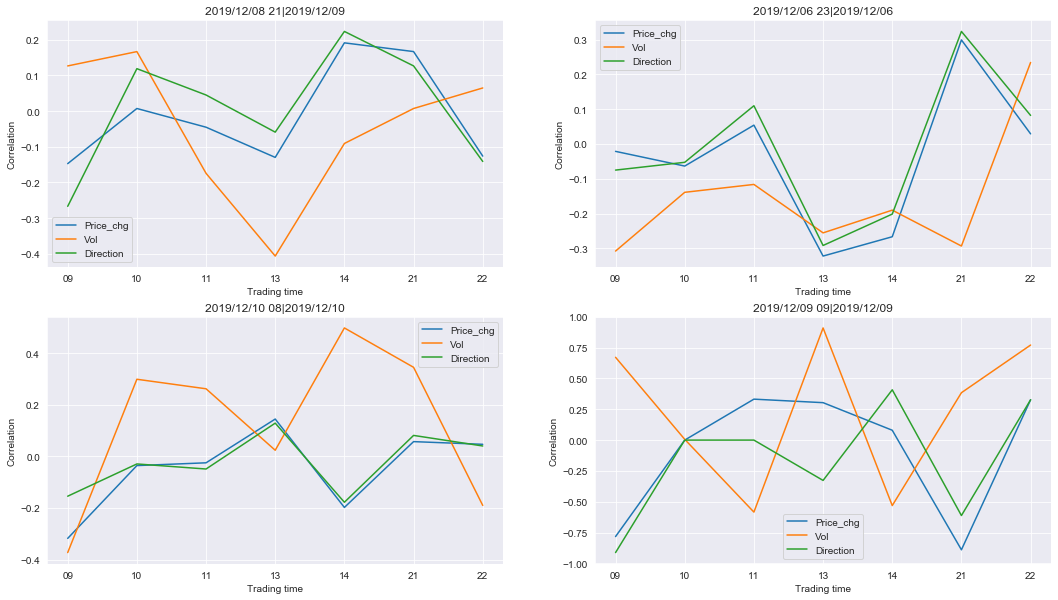

In [6]:
# 显示某时评论时间与某天全天交易情况的相关性
trading_hour = [' 09',' 10',' 11',' 13',' 14',' 15',' 21',' 22',' 23']
attributes = ['Price_chg','Vol','Direction']
sns.set_style('darkgrid')

def corr_graph(time1, date, element1, attributes):
    result = pd.DataFrame(columns=['Trading time','Price_chg','Vol','Direction'])
    for element2 in attributes:
        corr = []
        trd_time = []
        for i in trading_hour:
            time2 = date+i
            if np.isnan(compute_corr_hour(time1, time2, element1, element2)): pass
            else: 
                corr.append(compute_corr_hour(time1, time2, element1, element2))
                trd_time.append(i[1:])
        num = attributes.index(element2)
        result[element2] = corr
    result['Trading time'] = trd_time
    for i in range(len(attributes)):     
        plt.plot(np.array(trd_time),result[result.columns[i+1]])
        plt.xlabel('Trading time')
        plt.ylabel('Correlation')
    plt.legend(('Price_chg','Vol','Direction'))
    return result

plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
corr_graph('2019/12/08 21', '2019/12/09', '情绪离散度', attributes)
plt.title('2019/12/08 21|2019/12/09')
plt.subplot(2,2,2)
corr_graph('2019/12/06 23', '2019/12/06', '情绪离散度', attributes)
plt.title('2019/12/06 23|2019/12/06')
plt.subplot(2,2,3)
corr_graph('2019/12/10 08', '2019/12/10', '情绪离散度', attributes)
plt.title('2019/12/10 08|2019/12/10')
plt.subplot(2,2,4)
corr_graph('2019/12/09 09', '2019/12/09', '情绪离散度', attributes)
plt.title('2019/12/09 09|2019/12/09')

In [7]:
#Using Augmented Dikcy-Fuller to test the stationarity of the model
def tagADF(t):
    result = pd.DataFrame(index=[
            "Test Statistic Value", "p-value", "Lags Used", 
            "Number of Observations Used", 
            "Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"
        ],columns=['value']
    )
    result['value']['Test Statistic Value']=t[0]
    result['value']['p-value']=t[1]
    result['value']['Lags Used']=t[2]
    result['value']['Number of Observations Used'] = t[3]
    result['value']['Critical Value(1%)']=t[4]['1%']
    result['value']['Critical Value(5%)']=t[4]['5%']
    result['value']['Critical Value(10%)']=t[4]['10%']
    return result

adf_result = adfuller(timed_file['情绪离散度'])
tagADF(adf_result)
# Since the p-value is next to 0, we reject the null hypothesis of non-stationarity.


,value
Test Statistic Value,-4.59733
p-value,0.000130643
Lags Used,29
Number of Observations Used,3235
Critical Value(1%),-3.43237
Critical Value(5%),-2.86243
Critical Value(10%),-2.56725


In [261]:
# Ljung-box White noise test
def white_noise_test(timeseries):
    result = acorr_ljungbox(timeseries)
    data = np.c_[range(1,41), result[0], result[1]]
    table = pd.DataFrame(data, columns=['lag', "Test Statistic", "p-value"])
    return table

white_noise_test(timed_file['情绪离散度'])
# Since p-values are all smaller than 0.05, we reject the null hypothesis that the ts is a white noise series.

,lag,Test Statistic,p-value
0,1.0,465.252626,3.458144e-103
1,2.0,903.612056,6.069250e-197
2,3.0,1392.840902,1.053521e-301
3,4.0,1811.666379,0.000000e+00
4,5.0,2237.682459,0.000000e+00
5,6.0,2648.098499,0.000000e+00
6,7.0,3057.827513,0.000000e+00
7,8.0,3449.962765,0.000000e+00
8,9.0,3787.056783,0.000000e+00
9,10.0,4139.190666,0.000000e+00


In [153]:
# 正交化时间序列预测
def orthogonalize(dataframe, covariates):
    """
    ss = StandardScaler()                    
    trans_df = pd.DataFrame(ss.fit_transform(dataframe))
    trans_df.columns = dataframe.columns
    trans_df.set_index(dataframe.index,inplace=True)
    """
    trans_df = dataframe
    for item in covariates:
        lr = ols('NEXT_RET~'+item, trans_df).fit()
        print(lr.summary())
        trans_df[item+'_resid'] = lr.resid
    return trans_df

df = ts[['NEXT_RET','logPrice','lag1','Vol','Amt','Position','Position_chg','senti_index','senti_dev','comm_num']]
covariates = ['senti_index','senti_dev','comm_num']
df = orthogonalize(df, covariates)
df.corr()

                            OLS Regression Results                            
Dep. Variable:               NEXT_RET   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1222
Date:                Sun, 15 Dec 2019   Prob (F-statistic):              0.727
Time:                        22:57:47   Log-Likelihood:                 2291.0
No. Observations:                 437   AIC:                            -4578.
Df Residuals:                     435   BIC:                            -4570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.207e-05   6.16e-05      0.845      

,NEXT_RET,logPrice,lag1,Vol,Amt,Position,Position_chg,senti_index,senti_dev,comm_num,senti_index_resid,senti_dev_resid,comm_num_resid
NEXT_RET,1.000000,-0.075712,0.020043,-0.049522,-0.035163,-0.035872,-0.001369,-1.675910e-02,-8.629154e-03,-1.860876e-02,9.998596e-01,9.999628e-01,9.998268e-01
logPrice,-0.075712,1.000000,0.107221,0.911411,0.033697,0.043667,-0.087059,-5.859364e-02,4.222806e-01,6.024829e-01,-7.670519e-02,-7.207120e-02,-6.451215e-02
lag1,0.020043,0.107221,1.000000,0.151660,-0.047375,-0.046308,0.003103,-6.659645e-03,3.946313e-02,5.526797e-02,1.993409e-02,2.038419e-02,2.107502e-02
Vol,-0.049522,0.911411,0.151660,1.000000,0.016856,0.025940,-0.120806,-5.649122e-02,3.951739e-01,5.320665e-01,-5.047572e-02,-4.611359e-02,-3.962766e-02
Amt,-0.035163,0.033697,-0.047375,0.016856,1.000000,0.999950,0.189077,9.455964e-02,4.021974e-02,9.753638e-03,-3.358266e-02,-3.481691e-02,-3.498723e-02
Position,-0.035872,0.043667,-0.046308,0.025940,0.999950,1.000000,0.188164,9.393214e-02,4.443017e-02,1.577608e-02,-3.430267e-02,-3.549000e-02,-3.558466e-02
Position_chg,-0.001369,-0.087059,0.003103,-0.120806,0.189077,0.188164,1.000000,7.314560e-02,-3.312729e-02,-6.230803e-02,-1.431189e-04,-1.654876e-03,-2.528867e-03
senti_index,-0.016759,-0.058594,-0.006660,-0.056491,0.094560,0.093932,0.073146,1.000000e+00,-1.839549e-01,-1.577074e-01,-2.267754e-19,-1.834716e-02,-1.969725e-02
senti_dev,-0.008629,0.422281,0.039463,0.395174,0.040220,0.044430,-0.033127,-1.839549e-01,1.000000e+00,8.083246e-01,-1.171372e-02,-1.345834e-17,6.413874e-03
comm_num,-0.018609,0.602483,0.055268,0.532066,0.009754,0.015776,-0.062308,-1.577074e-01,8.083246e-01,1.000000e+00,-2.125478e-02,-1.163404e-02,4.610629e-18


In [155]:
lm1 = ols('NEXT_RET~logPrice+Position+senti_index+comm_num+senti_dev_resid', data=df).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NEXT_RET   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.450e+06
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:59:27   Log-Likelihood:                 4606.4
No. Observations:                 437   AIC:                            -9201.
Df Residuals:                     431   BIC:                            -9176.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0006      0.000     -2.574      0.010      -0.001      -0.000
logPrice         8.009e-05   2.81e-05      2.850      0.005    2.49e-05       0.000
Position        -3.262e-07   2.24e-07     -1.454      0.147   -7.67e-07    1.15e-07
senti_index      1.344e-06   6.57e-07      2.046      0.041     5.3e-08    2.63e-06
comm_num        -4.356e-06    1.8e-07    -24.261      0.000   -4.71e-06      -4e-06
senti_dev_resid     1.0000      0.000   4136.575      0.000       0.999       1.000
==============================================================================
Omnibus:                      269.514   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3479.354
Skew:                          -2.419   Prob(JB):                         0.00
Kurtosis:                      15.949   Cond. No.                     1.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# 每天(21时)的情绪值与隔天早盘开盘(9时)的相关性检验（日度）
def add_date(dataframe, col_name):
    date = dataframe[col_name].apply(lambda x: x[:10])
    dataframe.insert(0,'Date',date)
    return dataframe

def check_corr(sentiment_time, trading_time):
    
    df1 = p2005[p2005['Time'].apply(lambda x: x[-2:] == trading_time)]
    df1 = df1[['Time','logPrice','Vol','Position']].groupby('Time', as_index = False).mean()
    df2 = timed_file[timed_file['Hour'].apply(lambda x: x[-2:] == sentiment_time)]
    comment_num = df2[['Hour','情绪','情绪离散度']].groupby('Hour',as_index=False).count()['情绪']
    df2 = df2[['Hour','情绪','情绪离散度']].groupby('Hour',as_index=False).sum()
    df2['评论数'] = comment_num

    add_date(df2,'Hour')
    add_date(df1,'Time')

    df3 = df1.merge(df2, left_on='Date', right_on='Date')
    df3['lag1'] = df3['logPrice']
    df3['logPrice'] = df3['logPrice'].shift(-1).dropna()

    orthogonalize(df3, covariates)
    lm2 = ols('logPrice~情绪离散度resid', data=df3).fit()
    return lm2.summary()

check_corr('21', '09')
# 数据量过小，需要更大量的数据才能跑日度的检验。所以这只是个框架。

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     1.584
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.427
Time:                        19:59:20   Log-Likelihood:                 10.300
No. Observations:                   3   AIC:                            -16.60
Df Residuals:                       1   BIC:                            -18.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6665      0.011    779.251      0.0

/Users/alice/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/alice/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/alice/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/alice/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     1.711
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.416
Time:                        19:59:20   Log-Likelihood:                 10.372
No. Observations:                   3   AIC:                            -16.74
Df Residuals:                       1   BIC:                            -18.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6765      0.008   1137.690      0.001       8.580       8.773
情绪离散度resid     1.0000      0.764      1.308      0.416      -8.714      10.714
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.583
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.287
Skew:                           0.105   Prob(JB):                        0.866
Kurtosis:                       1.500   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""